### Hi Im Dhiraj a Masters in Data Science stuident (UHID: 2216950)
#### In this IPYNB file we can look into various web scrapping from websites like linkedin and market watch tables of major indexes around world,highest gainer stocks and other tables related to the market
#### Using Selenium automation and beautifulsoup

### To run the code please enter credentials for username and pwd of linkedin the output is shown when i entered my credentials, I stored my credentials as os enviromental variables for data privacy

In [46]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

# Creating a webdriver instance
driver = webdriver.Chrome("Enter-Location-Of-Your-Web-Driver")
# This instance will be used to log into LinkedIn

# Opening linkedIn's login page
driver.get("https://linkedin.com/uas/login")

# waiting for the page to load
time.sleep(5)

# entering username
username = driver.find_element(By.ID, "username")

# In case of an error, try changing the element
# tag used here.

# Enter Your Email Address
username.send_keys("")

# entering password
pword = driver.find_element(By.ID, "password")
# In case of an error, try changing the element
# tag used here.

# Enter Your Password
pword.send_keys("")	

# Clicking on the log in button
# //tagname[@attribute='value']
driver.find_element(By.XPATH, "//button[@type='submit']").click()
# XPath used here.

# Opening Kunal's Profile
# paste the URL of Kunal's profile here
profile_url = "https://www.linkedin.com/in/dhirajgongati/"

driver.get(profile_url)	 # this will open the link

# will be used in the while loop
initialScroll = 0
finalScroll = 1000
 
while True:
    driver.execute_script(f"window.scrollTo({initialScroll},{finalScroll})")
    # this command scrolls the window starting from
    # finalScroll variable
    initialScroll = finalScroll
    finalScroll += 1000
 
    # we will stop the script for 3 seconds for the data to load
    time.sleep(3)
    if finalScroll>5000:
        break

src = driver.page_source

# Now using beautiful soup
soup = BeautifulSoup(src, 'lxml')

# Extracting the HTML of the complete introduction box
# that contains the name and headings
intro = soup.find('div', {'class': 'pv-text-details__left-panel'})

print(intro)



about = soup.find("div", {'class': 'inline-show-more-text inline-show-more-text--is-collapsed inline-show-more-text--is-collapsed-with-line-clamp full-width'})
 
print(about)

experience = soup.find("div", {'class': 'pvs-entity pvs-entity--padded pvs-list__item--no-padding-in-columns'})

print(experience)
    
    




C:\Users\gonga\AppData\Local\Temp\ipykernel_1716\3803766384.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("Enter-Location-Of-Your-Web-Driver")


<div class="pv-text-details__left-panel">
<div>
<h1 class="text-heading-xlarge inline t-24 v-align-middle break-words">Dhiraj Kumar Reddy Gongati</h1>
<!-- -->
<span class="text-body-small v-align-middle break-words t-black--light">
     (He/Him)
  </span>
<!-- --><!-- --> </div>
<!-- --> <div class="text-body-medium break-words" data-generated-suggestion-target="urn:li:fsu_profileActionDelegate:-632745943">
      --Masters in Data Science
    </div>
<!-- --><!-- --><!-- --> </div>
<div class="inline-show-more-text inline-show-more-text--is-collapsed inline-show-more-text--is-collapsed-with-line-clamp full-width" style="-webkit-line-clamp:4;" tabindex="-1">
<span aria-hidden="true"><!-- -->•	I am a curious and ML enthusiastic person with 2 years of work experience and on-hand experience in<span class="white-space-pre"> </span><br/><!-- -->handling ML-based projects and their deployments.<!-- --><br/><!-- -->•	I am well experienced with SQL, Python and its libraries, and interactive Das

In [72]:
# In case of an error, try changing the tags used here.

name_loc = intro.find("h1")

# Extracting the Name
name = name_loc.get_text().strip()
# strip() is used to remove any extra blank spaces

tag = intro.find("div", {'class': 'text-body-medium'})

# this gives us the HTML of the tag in which the Company Name is present
# Extracting the Company Name
tag = tag.get_text().strip()


print("Name -->", name,
	"\nWorks At -->", tag)

Name --> Dhiraj Kumar Reddy Gongati 
Works At --> --Masters in Data Science


In [73]:
# Getting the HTML of the About section in the profile

about_part1 = about.get_text().strip()
    
    
print("About:") 
print(about_part1)

About:
•	I am a curious and ML enthusiastic person with 2 years of work experience and on-hand experience in handling ML-based projects and their deployments.•	I am well experienced with SQL, Python and its libraries, and interactive Dashboards using Power BI.•	During my tenure at “Capgemini”, I was enrolled in a hackathon conducted by the SAP AI division on “Customer duplicity” (unique to our team) use case. My team was awarded the 1st runner-up in the hackathon.•	I seek to leverage my coding, communication skills, synergy with other team members, and knowledge from my previous tenures to increase profitability for organizations.•	I am a curious and ML enthusiastic person with 2 years of work experience and on-hand experience in 
handling ML-based projects and their deployments.
•	I am well experienced with SQL, Python and its libraries, and interactive Dashboards using Power BI.
•	During my tenure at “Capgemini”, I was enrolled in a hackathon conducted by the SAP AI division on “Cust

In [74]:
# Getting the HTML of the Experience section in the profile
experience = soup.find("div", {'class': 'display-flex flex-column full-width'})

exp_1 = experience.get_text().strip()
    
    
print("Recent Experience:\n") 
print(exp_1)

    

Recent Experience:

Data AnalystData Analyst

 

Capgemini · Full-timeCapgemini · Full-time


Jun 2021 - Aug 2022 · 1 yr 3 mosJun 2021 - Aug 2022 · 1 yr 3 mos


Bengaluru, Karnataka, IndiaBengaluru, Karnataka, India


In [77]:
#convert data into data frame
import pandas as pd
df=pd.DataFrame(columns=["URL","Name","Tag","Recent Work Experience","About"])
df.loc[0,:]=profile_url,name,tag ,exp_1,about_part1
df

,URL,Name,Tag,Recent Work Experience,About
0,https://www.linkedin.com/in/dhirajgongati/,Dhiraj Kumar Reddy Gongati,--Masters in Data Science,Data AnalystData Analyst\n\n \n\nCapgemini · F...,•\tI am a curious and ML enthusiastic person w...


## Lets also see How we can pull tabular data from webseites and perform few visualizations on them

In [86]:
# Scrapping tabular data from URL like stock prices etc
URL = 'https://www.marketwatch.com/market-data/us'
dfs = pd.read_html(URL)

In [131]:
df=dfs[0]
df=df.drop([1],axis=0).reset_index().drop(["index"],axis=1)
df

,Name,Last,Chg,Chg %
0,Dow Jones Industrial Average,33535.91,115.14,0.34%
1,NASDAQ Composite Index,12688.84,188.27,1.51%
2,S&P 500 Index,4198.05,39.28,0.94%
3,Global Dow Realtime USD,3939.84,16.85,0.43%
4,Gold Continuous Contract,"$1,959.80",-25.10,-1.26%
5,Crude Oil WTI (NYM $/bbl) Front Month,$72.00,-0.83,-1.14%


In [132]:
# Changing the str type col to int col for ease of plotting
df["Chg %"]=df["Chg %"].astype(str)
for i in range(len(df)):
    a=df.iloc[i,3]
    df.loc[i,"Chg_percent"]=a[0:-1]
df["Chg_percent"]=df["Chg_percent"].astype(float)
df

,Name,Last,Chg,Chg %,Chg_percent
0,Dow Jones Industrial Average,33535.91,115.14,0.34%,0.34
1,NASDAQ Composite Index,12688.84,188.27,1.51%,1.51
2,S&P 500 Index,4198.05,39.28,0.94%,0.94
3,Global Dow Realtime USD,3939.84,16.85,0.43%,0.43
4,Gold Continuous Contract,"$1,959.80",-25.10,-1.26%,-1.26
5,Crude Oil WTI (NYM $/bbl) Front Month,$72.00,-0.83,-1.14%,-1.14


Text(0.5, 1.0, 'The Change in Major Global indexes Today')

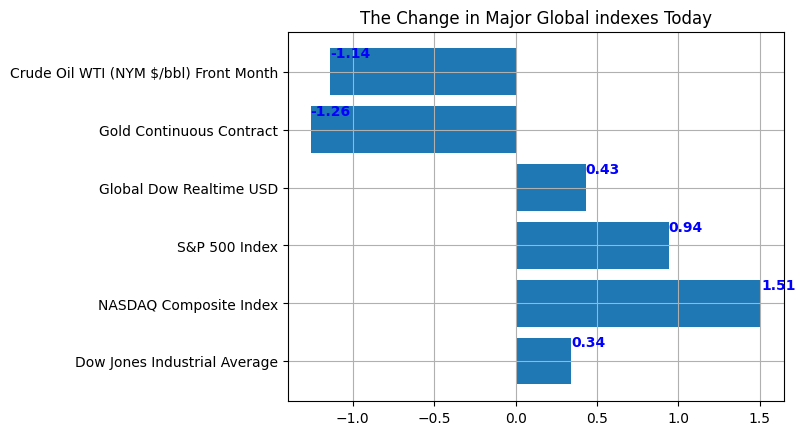

In [138]:
#lets chart the change %

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(df.Name,df["Chg_percent"])
for i, v in enumerate(df["Chg_percent"]):
    ax.text(v, i + .25, str(v), color='blue', fontweight='bold')
ax.grid()
plt.title("The Change in Major Global indexes Today")